### Q4

In [10]:
import pandas as pd

train = pd.read_csv('./titanic-a5/train.csv')
test = pd.read_csv('./titanic-a5/test.csv')

In [11]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
# target variable probably doesn't depend on these
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [14]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
# fill with train's median Age
test = test.fillna(value={'Age': train['Age'].median()})
train = train.fillna(value={'Age': train['Age'].median()})

In [56]:
# make new features
# e.g. C85 -> C and 85
# if multiple cabins, then keep first
train['CabinName'] = train['Cabin'].map(lambda x: 'Unknown' if type(x) == float else x.split(' ')[0][0])
train['CabinRoom'] = train['Cabin'].map(lambda x: -1 if type(x) == float or len(x.split(' ')[0]) < 2 else float(x.split(' ')[0][1:]))
test['CabinName'] = test['Cabin'].map(lambda x: 'Unknown' if type(x) == float else x.split(' ')[0][0])
test['CabinRoom'] = test['Cabin'].map(lambda x: -1 if type(x) == float or len(x.split(' ')[0]) < 2 else float(x.split(' ')[0][1:]))

train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinName,CabinRoom
0,0,3,male,22.0,1,0,7.2500,S,Unknown,-1.0
1,1,1,female,38.0,1,0,71.2833,C,C,85.0
2,1,3,female,26.0,0,0,7.9250,S,Unknown,-1.0
3,1,1,female,35.0,1,0,53.1000,S,C,123.0
4,0,3,male,35.0,0,0,8.0500,S,Unknown,-1.0


In [63]:
# assume NaN means did not embark
train['Embarked'] = train['Embarked'].map(lambda x: x if type(x) != float else 'No')

In [65]:
train.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
CabinName    0
CabinRoom    0
dtype: int64

In [67]:
test.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         1
Embarked     0
CabinName    0
CabinRoom    0
dtype: int64

In [69]:
test[test.isna()['Fare']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinName,CabinRoom
152,3,male,60.5,0,0,NaN,S,Unknown,-1.0


In [70]:
# not much info for this data point
test = test.dropna()

In [71]:
test.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
CabinName    0
CabinRoom    0
dtype: int64

In [72]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinName,CabinRoom
0,0,3,male,22.0,1,0,7.2500,S,Unknown,-1.0
1,1,1,female,38.0,1,0,71.2833,C,C,85.0
2,1,3,female,26.0,0,0,7.9250,S,Unknown,-1.0
3,1,1,female,35.0,1,0,53.1000,S,C,123.0
4,0,3,male,35.0,0,0,8.0500,S,Unknown,-1.0


In [74]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [81]:
missing = set(train.columns) - set(test.columns)
missing

{'CabinName_T', 'Embarked_No', 'Survived'}

In [82]:
test['CabinName_T'] = False
test['Embarked_No'] = False

In [86]:
# reorder
test = test[[c for c in train.columns if c != 'Survived']]

In [87]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
test = std.transform(test)

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

0.8044692737430168


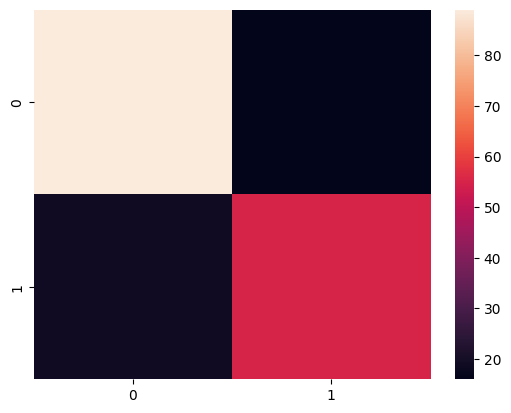

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()